# Introduction to Importing Data in Python

**Descripción del curso**

Como científico de datos, necesitará limpiar los datos, discutirlos y mezclarlos, visualizarlos, construir modelos predictivos e interpretar estos modelos. Sin embargo, antes de poder hacerlo, deberá saber cómo introducir datos en Python. En este curso, aprenderá las muchas formas de importar datos a Python: desde archivos planos como .txt y .csv; desde archivos nativos de otro software como hojas de cálculo de Excel, archivos Stata, SAS y MATLAB; y de bases de datos relacionales como SQLite y PostgreSQL.

## 1. Introduction and flat files

### Welcome to the course!

In [1]:
# LEER UN ARCHIVO DE TEXTO SIN FORMATO
filename = '../datasets/moby_dick.txt'
file = open(filename, mode="r") #'r' is para leer el archivo
# file = open(filename, mode="w") #'r' is para escribir en el archivo
text =  file.read()
file.close() # Cerrar la conexion al archivo

print(text)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [2]:
# Evitar cerrar la conexion otro modo de leer el archivo
with open(filename, mode="r") as file: ## Conocido como ADMINISTRADOR DE CONTEXTO
    print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [3]:
with open(filename) as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### The importance of flat files in data science

In [4]:
## ARCHIVOS PLANOS (.csv, .txt)
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Importing flat files using NumPy

In [5]:
# LINK DEL CONJUNTO DE DATOS MNIST 
# http://yann.lecun.com/exdb/mnist/

In [6]:
import numpy as np
filename = '../datasets/mnist.txt'
data = np.loadtxt(filename, delimiter=',',skiprows=1,usecols=[0,2],dtype=str)
# delimiter="\t": Son las tabulaciones
# skiprows=1: especificar cuántas filas (no índices) desea omitir
# usecols=[0,2]: Obteniendo la 1ra y la 3ra columna de los datos
# dtype=str: Asegurar que todas las matrices se importen como cadena
data[0:3]

array([['0.0', '0.0'],
       ['1.0', '0.0'],
       ['4.0', '0.0']], dtype='<U3')

<class 'numpy.ndarray'>


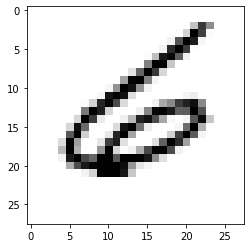

In [7]:
import matplotlib.pyplot as plt

file = '../datasets/mnist.txt'
digits = np.loadtxt(file, delimiter=",")
print(type(digits))

im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28)) # CAMBIAR las dimensiones de la MATRIZ SIN CAMBIAR SUS DATOS

plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

['Time' 'Percent']
[[9.90e+01 6.70e-02]
 [9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]
 [0.00e+00 5.00e-01]
 [0.00e+00 4.67e-01]
 [0.00e+00 8.57e-01]
 [0.00e+00 5.00e-01]
 [0.00e+00 3.57e-01]]


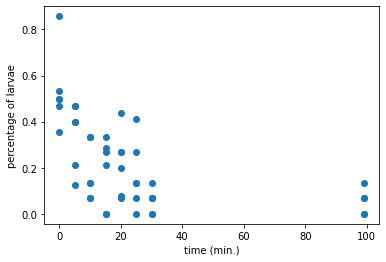

In [8]:
file = '../datasets/seaslugs.txt'

data = np.loadtxt(file, delimiter='\t', dtype=str)
print(data[0])

data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)
print(data_float[0:10])

plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

In [9]:
#
# np.genfromtxt (dtype=None )
# Descubrir el tipo de cada columna

In [10]:
file = '../datasets/titanic.csv'
data = np.genfromtxt(file, delimiter=',', names=True, dtype=None)
# names = True: Nos dice que hay un encabezado

<ipython-input-10-1519ff726ba8>:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(file, delimiter=',', names=True, dtype=None)


In [11]:
np.shape(data) # matriz estructurada 1D

(891,)

In [12]:
d = np.recfromcsv(file)
print(np.shape(d))
print(d[:3]) # d[0:3] == d[:3] : Traen 3 filas

(891,)
[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\Users\Skull\anaconda3\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas 🔥

In [13]:
import pandas as pd
file = '../datasets/titanic.csv'
data = pd.read_csv(file)
data.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [14]:
print(data.shape)

(891, 11)


In [15]:
# Convirtiendo el marco de datos -> una matriz numpy
data_array = data.values
data_array

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [16]:
file = '../datasets/digits.csv'
data = pd.read_csv(file,nrows=5,header=None)
# header=None: No tiene Encabezado
# nrows=5: Traer las 1ras 5 filas
# --
# sep="\t"
# comment='#'
# na_values='Nothing': NA/NaN

data_array = data.values
print(type(data_array)) # Tipo -- numpy.ndarray

<class 'numpy.ndarray'>


### Final thoughts on data import

## 2. Importing data from other file types

In [17]:
# ARCHIVOS: MATLAB files, SAS files, STATA files, HDF5 files, PICKLED files

### Introduction to other file types

In [18]:
import os # importa el sistema operativo de la biblioteca
wd = os.getcwd() # almacena el nombre del directorio actual en una cadena
wd

'C:\\Users\\Skull\\Documents\\JUPYTER\\DATASCIENCIEFEM\\data-scientist-with-python-datacamp\\notebooks'

In [19]:
os.listdir(wd) # envía el contenido del directorio en una lista al shell

['.ipynb_checkpoints',
 '1.Introduction to Python.ipynb',
 '10. Python Data Science Toolbox (Part 1).ipynb',
 '11. Python Data Science Toolbox (Part 2).ipynb',
 '12. Intermediate Data Visualization with Seaborn.ipynb',
 '14. Introduction to Importing Data in Python.ipynb',
 '2.Intermediate Python.ipynb',
 '4.Data Manipulation with pandas.ipynb',
 '6. Joining Data with pandas.ipynb',
 '8. Introduction to Data Visualization with Matplotlib.ipynb',
 '9. Introduction to Data Visualization with Seaborn.ipynb',
 'A. SKILL ASSEMENT __ Python Programming.ipynb',
 'new_dogs_with_bmi.csv']

In [20]:
# Cargando archivo PICKLED
# - pickled: convertir el objeto en una secuencia de bytes o en una corriente de bytes.

In [21]:
# ADICIONAL Crear un archivo tipo PICKLED
import pickle
# file = '../datasets/data.pickle'
players = [{'user_id':  1,'killed_monsters':  36,'rank': 'normal'},
        {'user_id':  2,'killed_monsters':  1140,'rank': 'pro'},
        {'user_id':  3,'killed_monsters':  1,'rank': 'noob'}]
with open('data.pickle', 'wb') as f:
        pickle.dump(players, f)

In [22]:
import pickle
file = '../datasets/data.pkl'
with open(file,'rb') as file: # rb: Especifica que es de lectura y binario
    data = pickle.load(file)
print(data)

[{'user_id': 1, 'killed_monsters': 36, 'rank': 'normal'}, {'user_id': 2, 'killed_monsters': 1140, 'rank': 'pro'}, {'user_id': 3, 'killed_monsters': 1, 'rank': 'noob'}]


In [23]:
# Cargando archivo EXCEL

In [24]:
import pandas as pd
file = '../datasets/battledeathExcel.xlsx'
data = pd.ExcelFile(file) # Trabajar con archivos excel
print(data.sheet_names) # Saber las hojas del excel

['2002', '2004']


In [25]:
df1 = data.parse('2004')
print(df1.head())
print("--------------")
df2 = data.parse(0)
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
--------------
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [28]:
## skiprows=[1] : OMITIR la primera fila de datos
## names=[...]: NOMBRAR COLUMNAS
## usecols = [0]: ANALIZAR solo la 1ra columna

df1 = data.parse(0, skiprows=[1], names=['Country','AAM due to War (2002)'])
print(df1.head())
print("--------------")
df2 = data.parse(1, usecols=[0], skiprows=[4], names=['Country']) # Omitio la fila nro 4
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
--------------
               Country
0          Afghanistan
1              Albania
2              Algeria
3               Angola
4  Antigua and Barbuda


### Importing SAS/Stata files using pandas

In [31]:
pip install sas7bdat

  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16299 sha256=875ed8ca683be726973c6b1581b7c7b33e2aafe10090b400c11b6f2add18105a
  Stored in directory: c:\users\skull\appdata\local\pip\cache\wheels\7f\b3\50\0ef27ea1b8d14375a602b74e4dc756cd626e9372c0c27f6ee2
Successfully built sas7bdat
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Importing SAS files
file = '../datasets/sales.sas7bdat'

import pandas as pd
from sas7bdat import SAS7BDAT
with SAS7BDAT(file) as file:
    df_sas = file.to_data_frame()
df_sas.head()

YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000

In [37]:
# Importing Stata files
file = '../datasets/infectious_diseases.dta'
df = pd.read_stata(file)
df.head()

wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0.98    0.61    0.00  
2    0.00    0.00    0.16  
3    0.00    0.00    0.00  
4    0.01    0.00    0.11  

[5 rows x 27 columns]

### Importing HDF5 files

In [ ]:
# LINK EXAMPLE PROJECT
# https://www.gw-openscience.org/GW150914data/LOSC_Event_tutorial_GW150914.html

In [39]:
import h5py
file = '../datasets/Ligo.hdf5'
data = h5py.File(file, 'r')
print(type(data), '\n')

for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'> 

meta
quality
strain


Strain


<ipython-input-40-06e28b748a52>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  strain = data['strain']['Strain'].value


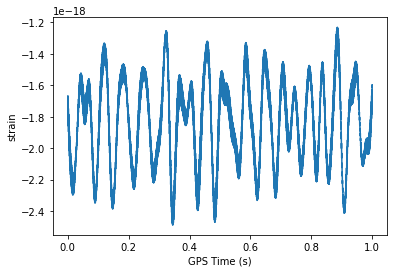

In [40]:
group = data['strain']

for key in group.keys():
    print(key)
    
strain = data['strain']['Strain'].value
num_samples = 10000
time = np.arange(0, 1, 1/num_samples)

plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### Importing MATLAB files

In [41]:
# Funcion SciPy nos permite leer y escribir archivos .mat
file = '../datasets/gene_expresion_matlab.mat'

import scipy.io
mat = scipy.io.loadmat(file)
print(type(mat))

<class 'dict'>


In [ ]:
# Informacion del dataset
# https://www.mcb.ucdavis.edu/faculty-labs/albeck/workshop.htm

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'> 

(200, 137)


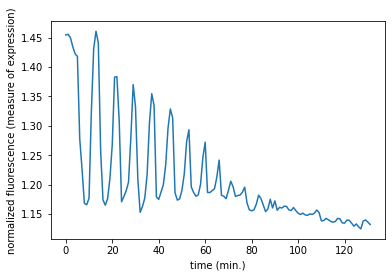

In [43]:
print(mat.keys())
print(type(mat['CYratioCyt']), '\n')
print(np.shape(mat['CYratioCyt']))

data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

## 3. Working with relational databases in Python

In [44]:
# PostgreSQL
# MySQL
# SQLite
# SQL = Structure Query Languaje

### Creating a database engine in Python

In [45]:
# SQLite : Es mas rapido y simple

In [50]:
file = 'sqlite:///../datasets/Chinook.sqlite'
# Link de dataset  Chinook database:
# https://github.com/lerocha/chinook-database

from sqlalchemy import create_engine
# create_engine: Para encender un motor SQL para que comunique nuestras consultas a la BD
engine = create_engine(file)
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### Querying relational databases in Python

In [51]:
# fetchall recupera todas las filas
# fetchmany : Importar un # de filas

In [54]:
from sqlalchemy import create_engine
engine = create_engine(file)

con = engine.connect() # Enciende la conexion
rs = con.execute('SELECT * from Album')
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close()
df.head()

AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3

In [56]:
# PERSONALIZANDO QUERY
with engine.connect() as con: # CONECTAR
    rs = con.execute("SELECT LastName, Title FROM Employee") # EJECUTAR
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()
print(len(df))
df.head()

3


LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent

In [58]:
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
df.head()

EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com

In [60]:
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE City = 'Calgary'")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
df.head()

EmployeeId  LastName FirstName                Title  ReportsTo  \
0           2   Edwards     Nancy        Sales Manager          1   
1           3   Peacock      Jane  Sales Support Agent          2   
2           4      Park  Margaret  Sales Support Agent          2   
3           5   Johnson     Steve  Sales Support Agent          2   
4           6  Mitchell   Michael           IT Manager          1   

             BirthDate             HireDate               Address     City  \
0  1958-12-08 00:00:00  2002-05-01 00:00:00          825 8 Ave SW  Calgary   
1  1973-08-29 00:00:00  2002-04-01 00:00:00         1111 6 Ave SW  Calgary   
2  1947-09-19 00:00:00  2003-05-03 00:00:00      683 10 Street SW  Calgary   
3  1965-03-03 00:00:00  2003-10-17 00:00:00          7727B 41 Ave  Calgary   
4  1973-07-01 00:00:00  2003-10-17 00:00:00  5827 Bowness Road NW  Calgary   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   
1    AB  Canada    T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
2    AB  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
3    AB  Canada    T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   
4    AB  Canada    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899   

                      Email  
0     nancy@chinookcorp.com  
1      jane@chinookcorp.com  
2  margaret@chinookcorp.com  
3     steve@chinookcorp.com  
4   michael@chinookcorp.com

In [61]:
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee ORDER BY BirthDate')
    df = pd.DataFrame(rs)
    df.columns = rs.keys()
df.head()

EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
1    AB  Canada    T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   
2    AB  Canada    T5K 2N1  +1 (780) 428-9482  +1 (780) 428-3457   
3    AB  Canada    T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   
4    AB  Canada    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772   

                      Email  
0  margaret@chinookcorp.com  
1     nancy@chinookcorp.com  
2    andrew@chinookcorp.com  
3     steve@chinookcorp.com  
4     laura@chinookcorp.com

### Querying relational databases directly with pandas

In [65]:
# MEJOR FORMA DE TRABAJAR CON PANDAS
file = 'sqlite:///../datasets/Chinook.sqlite'

from sqlalchemy import create_engine
import pandas as pd

# -------------- FORMA MAS REDUCIDA
engine = create_engine(file)
df = pd.read_sql_query("SELECT * FROM Album", engine) # Argumento, Motor a conectarse
print(df.head())

# ------------- FORMA MAS LARGA REDUCIDA
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


In [66]:
df = pd.read_sql_query('SELECT * FROM Employee where EmployeeId >= 6 ORDER BY BirthDate',
                       engine)
df.head()

EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com

In [68]:
with engine.connect() as con:
    rs= con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

df.head()

Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith

In [69]:
df = pd.read_sql_query('select * from PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId where Milliseconds < 250000',engine )
df.head()

PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99